In [8]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

from d2l import torch as  d2l


In [6]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='./data',transform=trans, train=True,download=True)

mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=trans, download=True)

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [5]:
len(mnist_train), len(mnist_test)

(60000, 10000)

array([<Axes: title={'center': 'bag'}>, <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'shirt'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'bag'}>, <Axes: title={'center': 'bag'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'coat'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>], dtype=object)

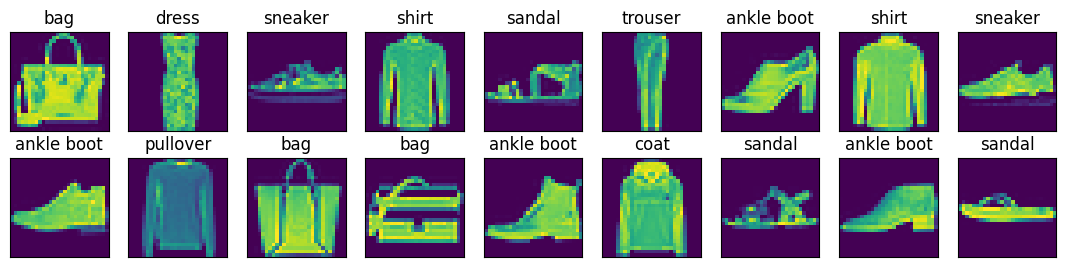

In [17]:
X,y = next(iter(data.DataLoader(mnist_train,shuffle=True, batch_size=18)))
d2l.show_images(X.reshape(18, 28, 28) ,2,9,titles= d2l.get_fashion_mnist_labels(y))

In [15]:
X.shape

torch.Size([18, 1, 28, 28])

In [22]:
#读取小批量

batch_size =256

num_worker = 4
train_iter = data.DataLoader(mnist_train, batch_size , shuffle=True, num_workers = num_worker)

#查看时间

timer = d2l.Timer()

for X,y in train_iter:
    continue
f'{timer.stop()} sec'

'6.148301601409912 sec'

## Softmax回归

In [26]:
batch_size =256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


100.0%


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



In [30]:
#初始化模型
num_input = 784
num_output = 10
W = torch.normal(0, 0.01, size=(num_input, num_output), requires_grad=True)
b = torch.zeros(num_output, requires_grad=True)

In [43]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim = True) #按行求和，理解成把每个特征的exp求和
    return X_exp/partition #广播机制每个元素都除以partition

In [44]:
#测试
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)


(tensor([[0.2374, 0.0295, 0.2692, 0.1523, 0.3116],
         [0.0155, 0.2022, 0.3283, 0.2107, 0.2433]]),
 tensor([1.0000, 1.0000]))

In [46]:
#soft max实现
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)